# Image Classification 

## Bishal Neupane  | Saugat Gyawali

# 

## Importing libraries


In [290]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow_hub as hub
from tensorflow.keras.applications import imagenet_utils

## Specifing the path of train, test and validation sets of data

In [247]:
train_path = r'C:\Users\bisha\OneDrive\Desktop\chest_xray\train'
test_path = r'C:\Users\bisha\OneDrive\Desktop\chest_xray\test'
validation_path = r'C:\Users\bisha\OneDrive\Desktop\chest_xray\val'

In [490]:
train_batches = ImageDataGenerator(rescale = 1./255, 
                                  shear_range=0.22,
                                   zoom_range=0.1).flow_from_directory(directory=train_path,target_size=(224,224),classes=['Normal', 'Pneumonia'], batch_size=20)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(directory=test_path,target_size=(224,224),classes=['Normal', 'Pneumonia'], batch_size=20, shuffle = False)
validation_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(directory=validation_path,target_size=(224,224),classes=['Normal', 'Pneumonia'], batch_size=20)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Getting images and labels

In [249]:
train_images, train_labels = next(train_batches)
#test_images, test_labels = next(test_batches)
#validation_images, validation_labels = next(validation_batches)

### Plotting images along with their corresponding labels 

In [250]:
def plotImageFunction(images):
    fig,axes = plt.subplots(4,5, figsize=(40,40))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()

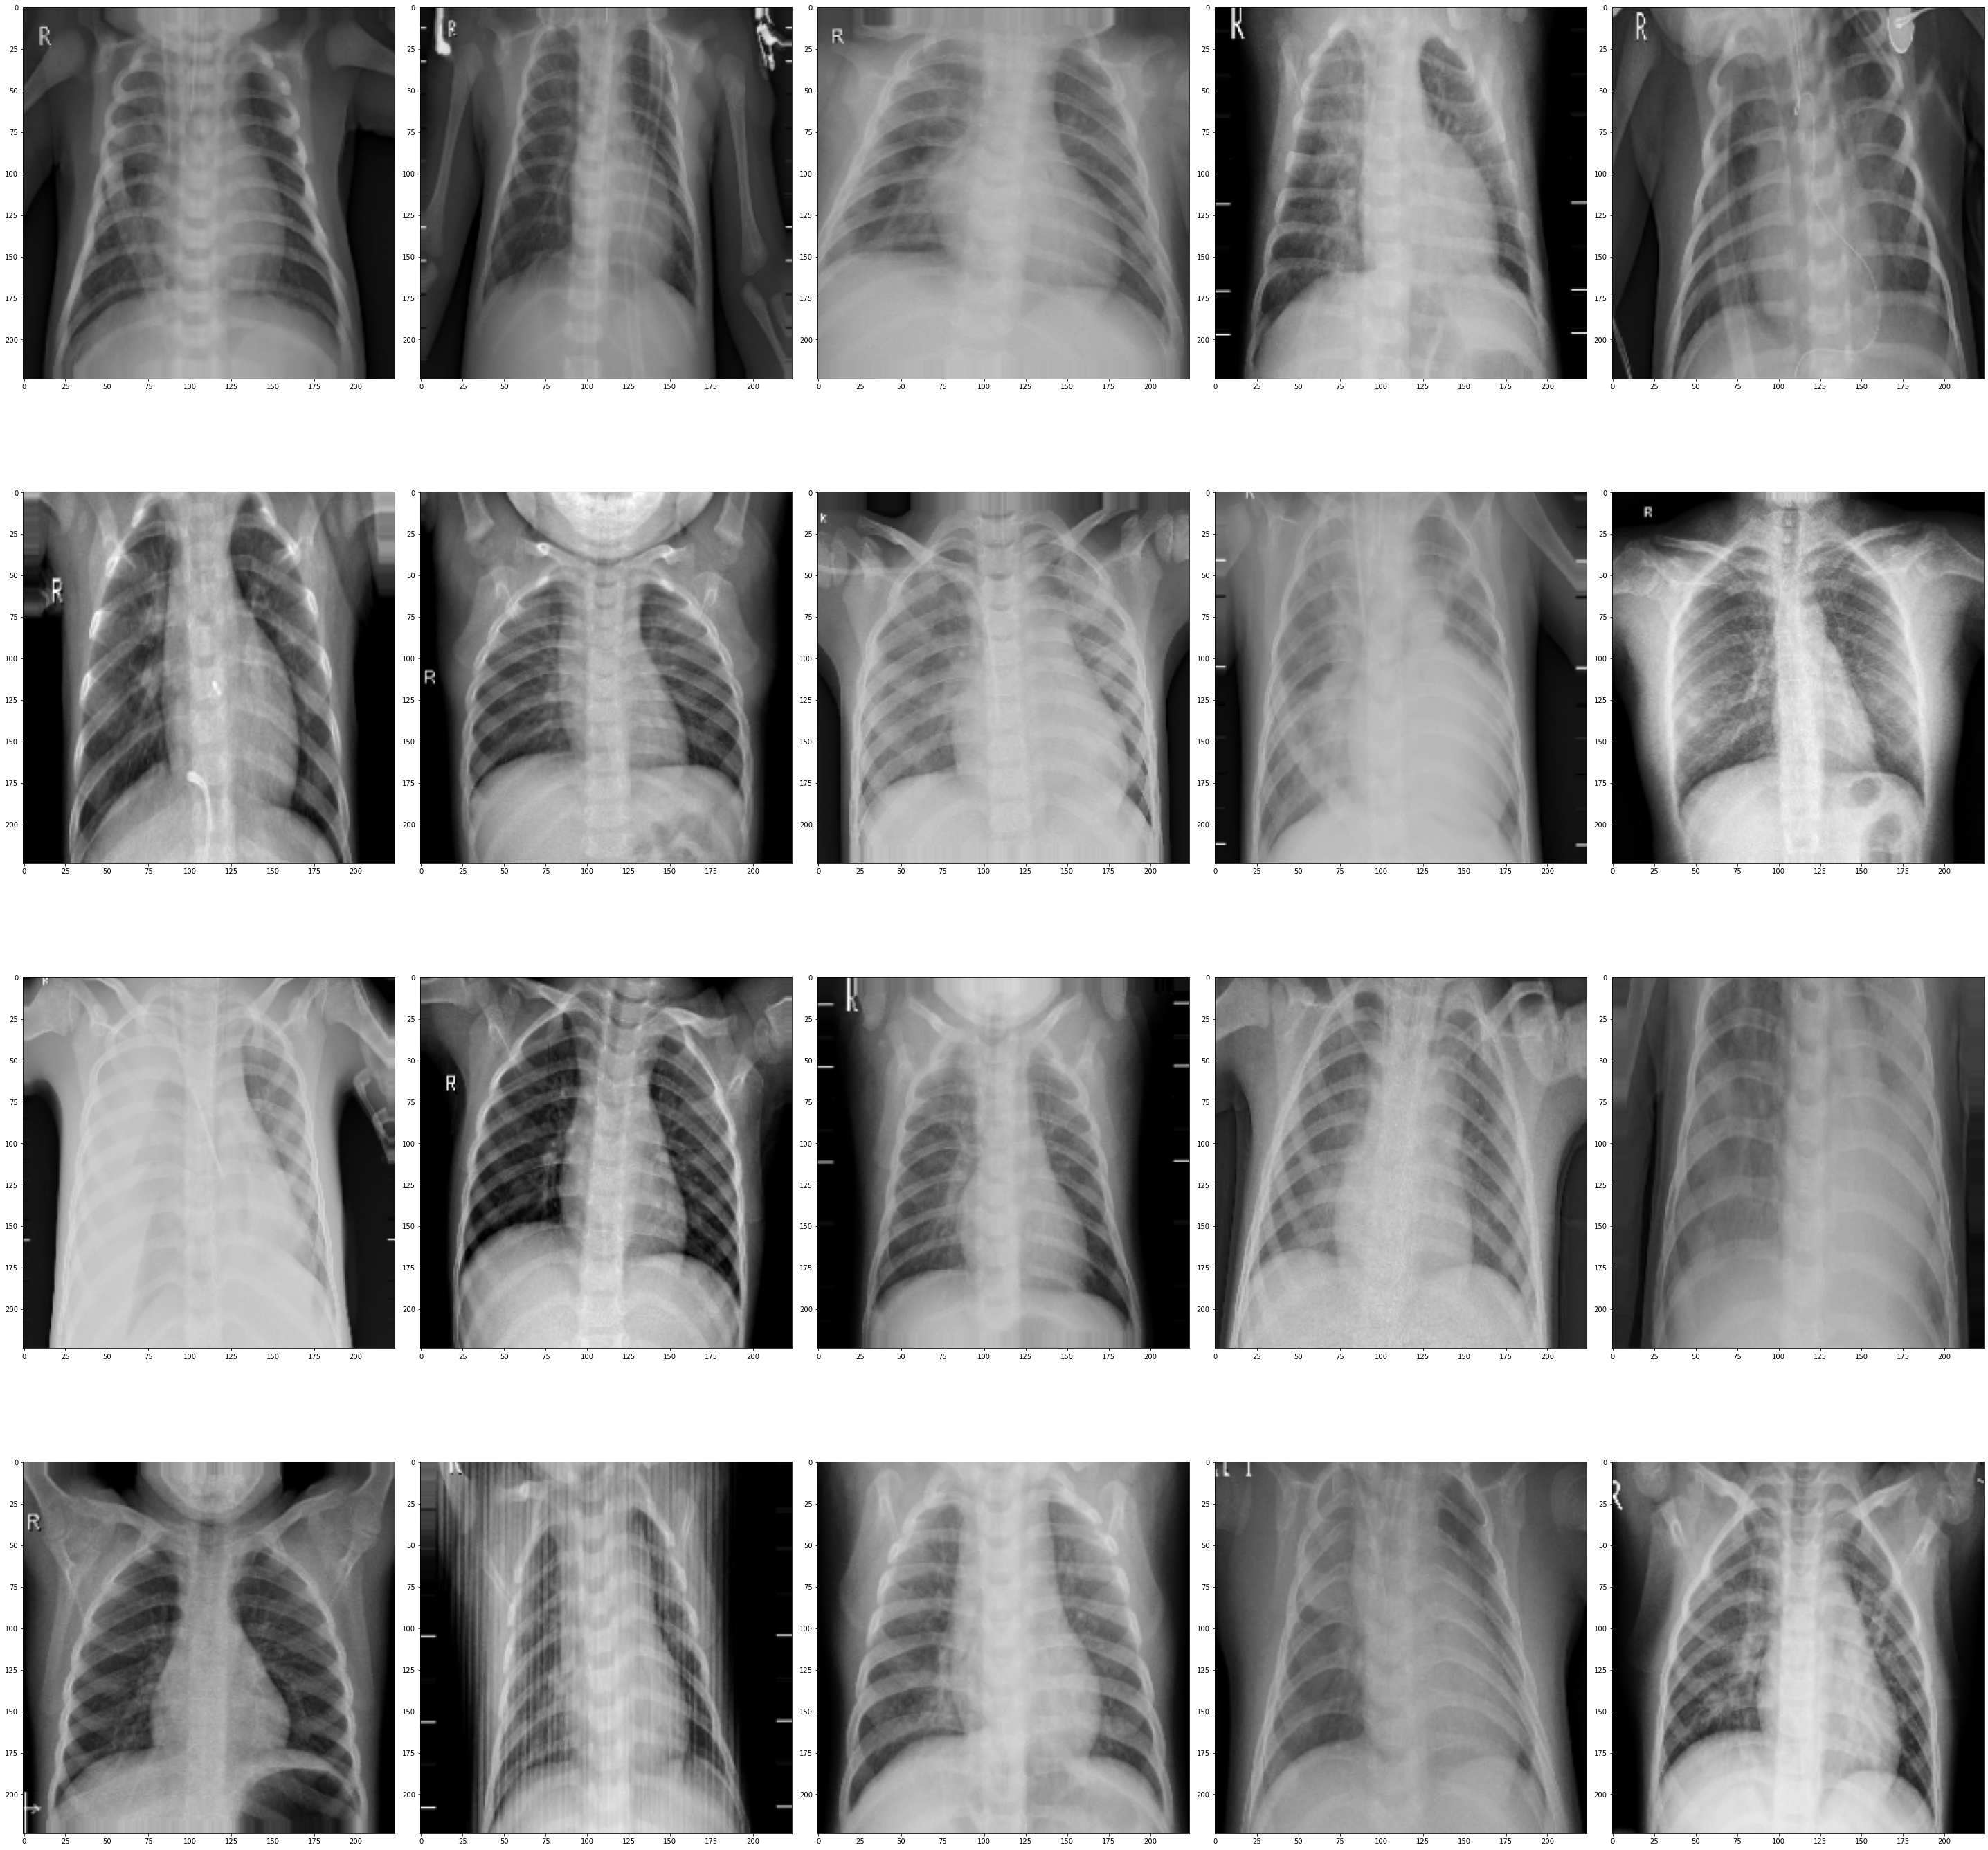

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [251]:
plotImageFunction(train_images)
print(train_labels)

## Build and Train A CNN


In [252]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3), activation ='relu', padding ='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides = 2),
    Conv2D(filters=64,kernel_size=(3,3), activation ='relu', padding ='same'),
    MaxPool2D(pool_size=(2,2),strides = 2),
    Conv2D(filters=128,kernel_size=(3,3), activation ='relu', padding ='same'),
    MaxPool2D(pool_size=(2,2),strides = 2),
    Flatten(),
    Dense(units=2,activation='softmax')
    
    
])

In [253]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 100352)          

In [254]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [255]:
model.fit(x=train_batches, validation_data=validation_batches,epochs=10,verbose=2)

Epoch 1/10
261/261 - 280s - loss: 0.5440 - accuracy: 0.7416 - val_loss: 0.7588 - val_accuracy: 0.5000
Epoch 2/10
261/261 - 229s - loss: 0.3848 - accuracy: 0.8299 - val_loss: 0.6648 - val_accuracy: 0.6250
Epoch 3/10
261/261 - 229s - loss: 0.2515 - accuracy: 0.9018 - val_loss: 0.6647 - val_accuracy: 0.6250
Epoch 4/10
261/261 - 233s - loss: 0.2014 - accuracy: 0.9231 - val_loss: 0.8210 - val_accuracy: 0.6250
Epoch 5/10
261/261 - 278s - loss: 0.1678 - accuracy: 0.9381 - val_loss: 0.7099 - val_accuracy: 0.6250
Epoch 6/10
261/261 - 240s - loss: 0.1511 - accuracy: 0.9511 - val_loss: 0.6547 - val_accuracy: 0.6250
Epoch 7/10
261/261 - 229s - loss: 0.1351 - accuracy: 0.9509 - val_loss: 0.4004 - val_accuracy: 0.8125
Epoch 8/10
261/261 - 228s - loss: 0.1308 - accuracy: 0.9553 - val_loss: 0.6626 - val_accuracy: 0.6875
Epoch 9/10
261/261 - 229s - loss: 0.1260 - accuracy: 0.9569 - val_loss: 0.5970 - val_accuracy: 0.6875
Epoch 10/10
261/261 - 232s - loss: 0.1171 - accuracy: 0.9565 - val_loss: 0.4076 - 

In [256]:
test_accuracy  = model.evaluate(test_batches)


32/32 [==============================] - 15s 461ms/step - loss: 0.3962 - accuracy: 0.8574


## Prediction

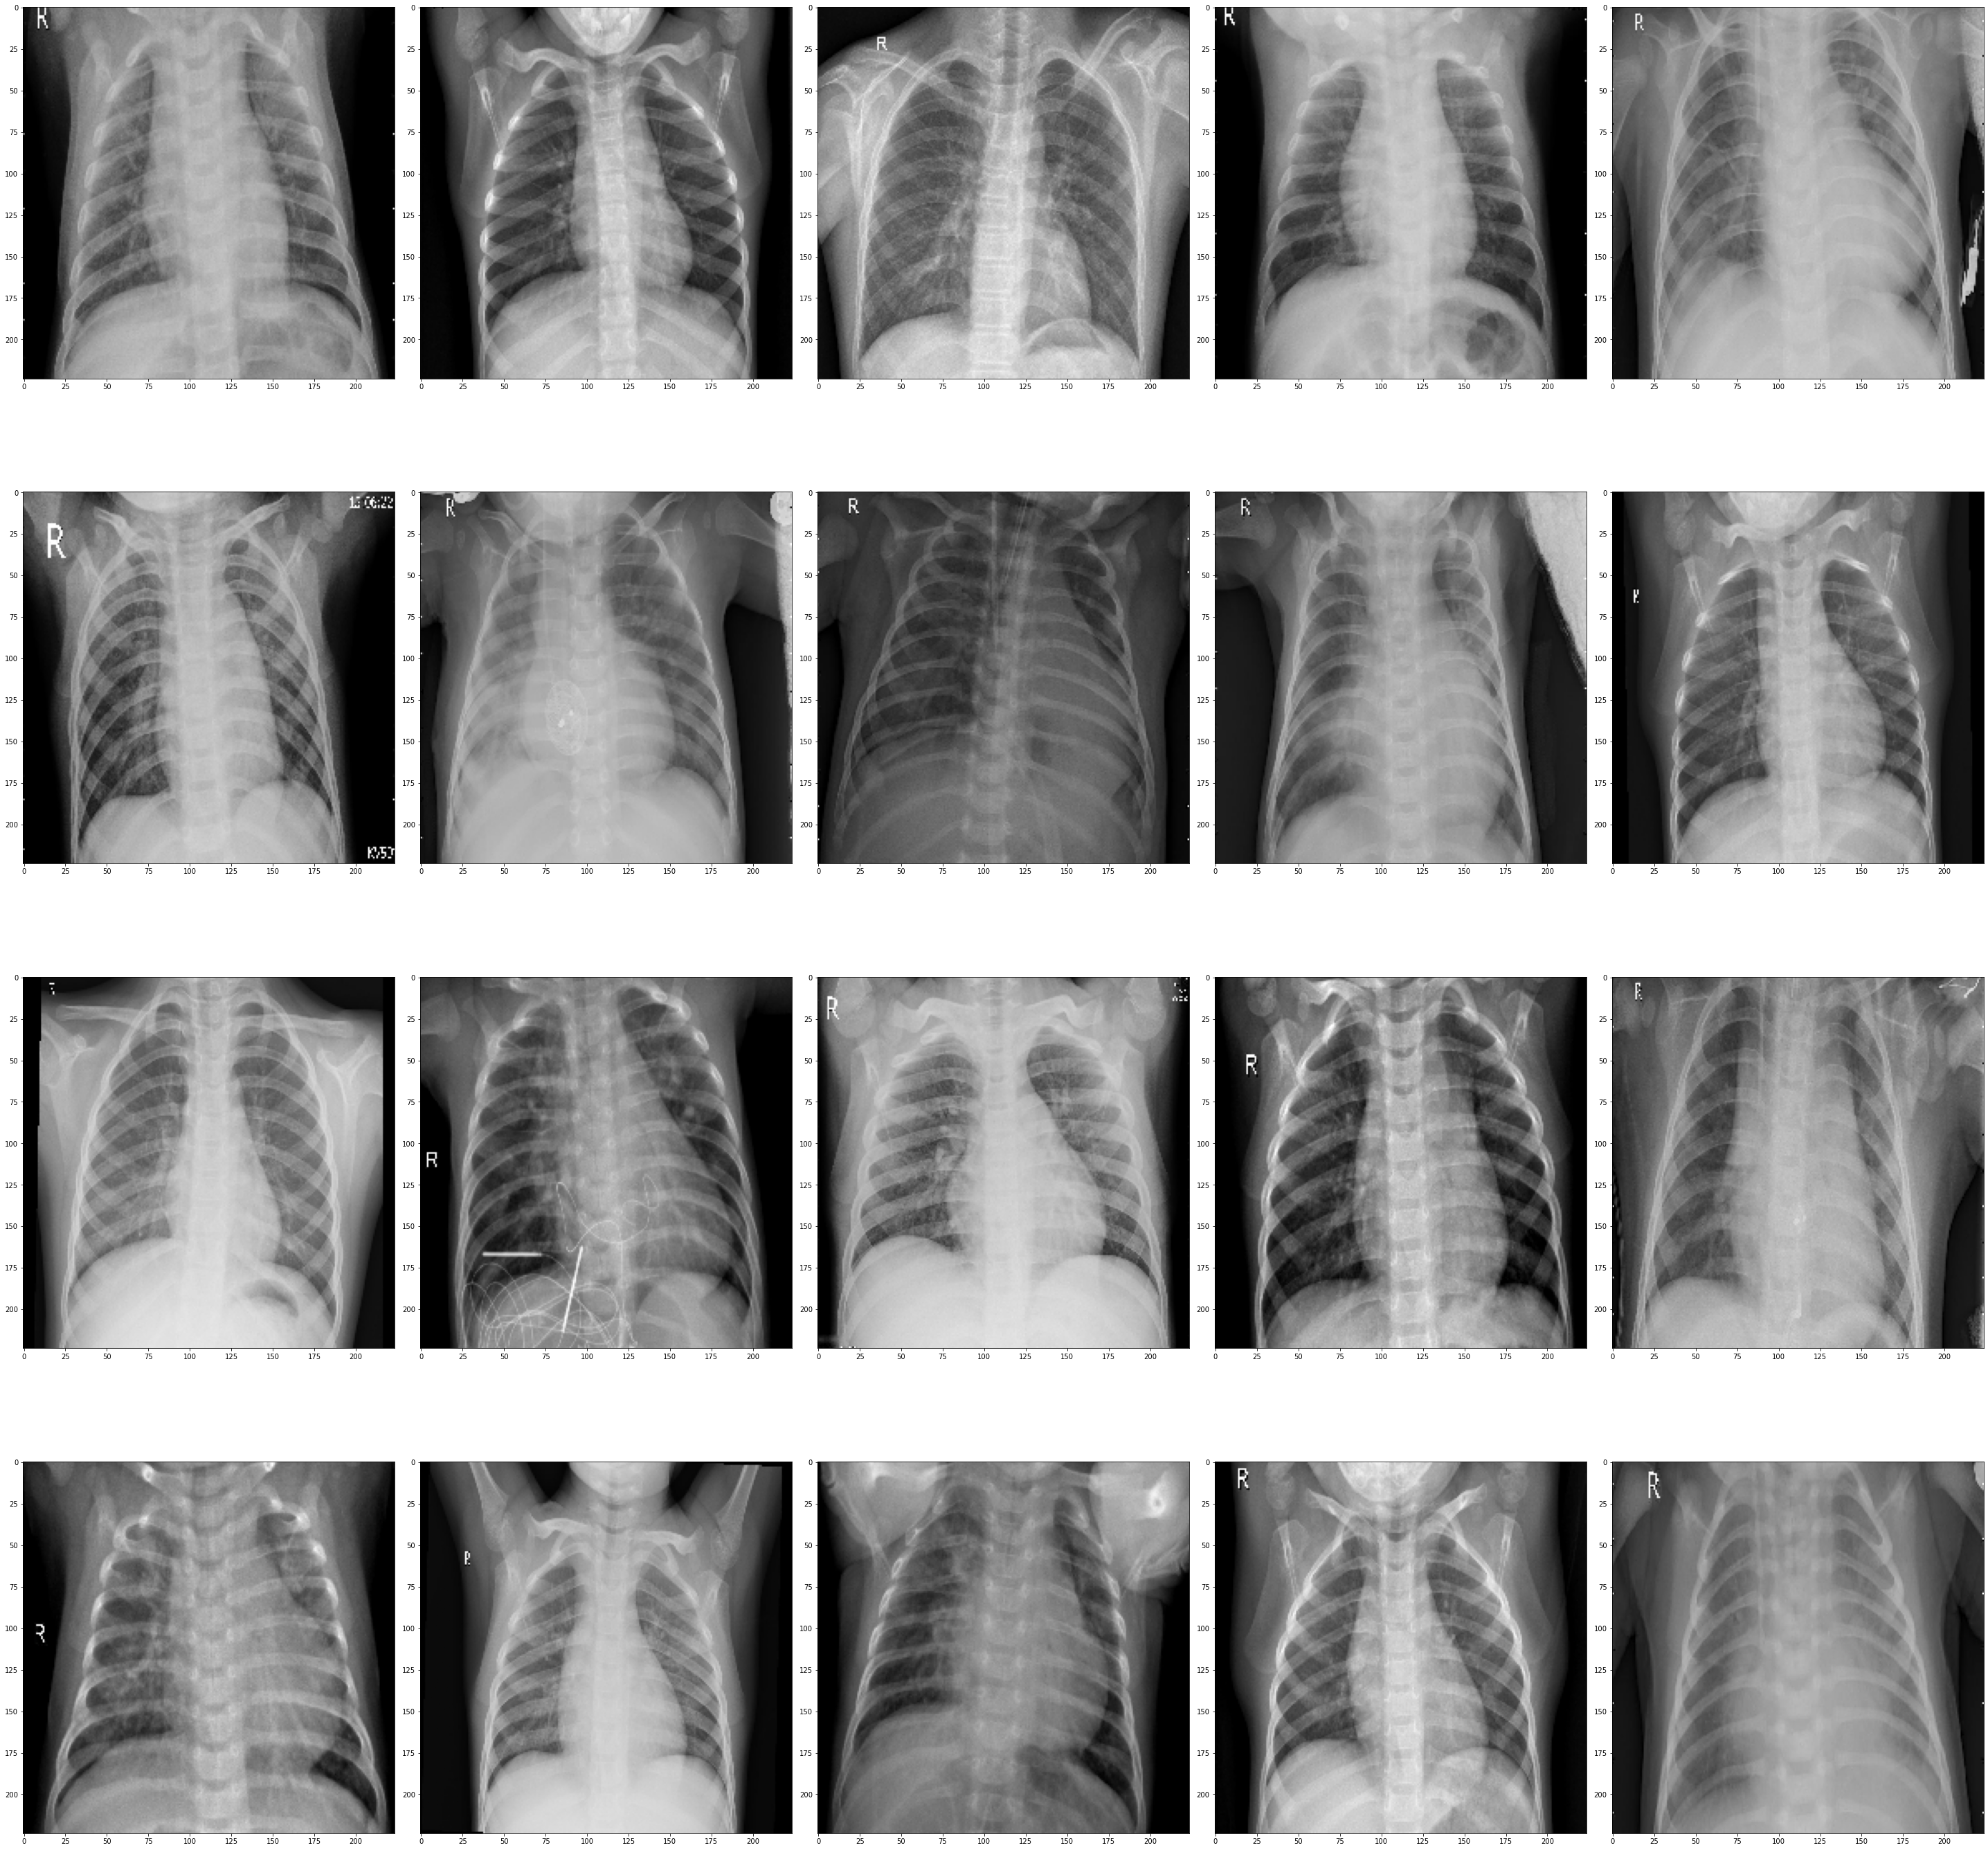

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [257]:
test_images, test_labels = next(test_batches)
plotImageFunction(test_images)
print(test_labels)

In [258]:
predictions = model.predict(x=test_batches,verbose=0)

In [259]:
confusionMatrix = confusion_matrix(test_batches.classes, y_pred = np.argmax(predictions,axis=-1))

<AxesSubplot:>

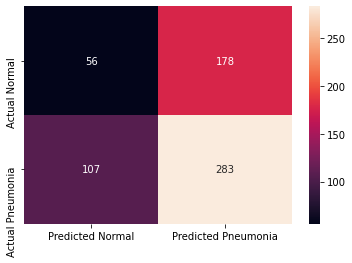

In [260]:
import pandas as pd
cm = pd.DataFrame(data=confusion_matrix(test_batches.classes, np.argmax(predictions,axis=-1), labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [261]:
print(classification_report(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1),target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.34      0.24      0.28       234
   PNEUMONIA       0.61      0.73      0.67       390

    accuracy                           0.54       624
   macro avg       0.48      0.48      0.47       624
weighted avg       0.51      0.54      0.52       624



#  Transfer Learning

## VGG 16

In [271]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [272]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [274]:
type(vgg16_model)


keras.engine.functional.Functional

In [277]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [278]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [279]:
for layer in model.layers:
    layer.trainable = False

In [280]:
model.add(Dense(2, activation='softmax'))

In [281]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [282]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [284]:
history = model.fit(train_batches, validation_data= validation_batches, epochs = 10,verbose=2)

Epoch 1/10
261/261 - 716s - loss: 0.4046 - accuracy: 0.7966 - val_loss: 0.6173 - val_accuracy: 0.5625
Epoch 2/10
261/261 - 699s - loss: 0.3247 - accuracy: 0.8660 - val_loss: 0.8291 - val_accuracy: 0.5000
Epoch 3/10
261/261 - 655s - loss: 0.2923 - accuracy: 0.8825 - val_loss: 0.5798 - val_accuracy: 0.6250
Epoch 4/10
261/261 - 653s - loss: 0.2697 - accuracy: 0.8911 - val_loss: 0.6149 - val_accuracy: 0.6250
Epoch 5/10
261/261 - 682s - loss: 0.2524 - accuracy: 0.9034 - val_loss: 0.5594 - val_accuracy: 0.7500
Epoch 6/10
261/261 - 656s - loss: 0.2402 - accuracy: 0.9112 - val_loss: 0.5729 - val_accuracy: 0.7500
Epoch 7/10
261/261 - 658s - loss: 0.2302 - accuracy: 0.9149 - val_loss: 0.5230 - val_accuracy: 0.7500
Epoch 8/10
261/261 - 659s - loss: 0.2233 - accuracy: 0.9202 - val_loss: 0.5672 - val_accuracy: 0.7500
Epoch 9/10
261/261 - 658s - loss: 0.2128 - accuracy: 0.9241 - val_loss: 0.5975 - val_accuracy: 0.7500
Epoch 10/10
261/261 - 667s - loss: 0.2120 - accuracy: 0.9247 - val_loss: 0.6002 - 

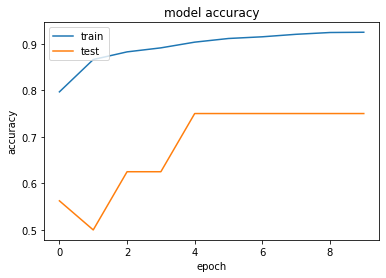

In [285]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction using fine-tuned VGG16

In [286]:
predictions= model.predict(test_batches, verbose=0)

In [287]:
confusionMatrix = confusion_matrix(test_batches.classes, y_pred = np.argmax(predictions,axis=-1))

In [519]:
y_pred = np.argmax(predictions,axis=-1)

In [587]:
len(predictions)

624

numpy.ndarray

<AxesSubplot:>

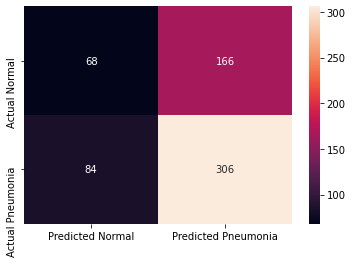

In [288]:
import pandas as pd
cm = pd.DataFrame(data=confusion_matrix(test_batches.classes, np.argmax(predictions,axis=-1), labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [289]:
print(classification_report(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1),target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.45      0.29      0.35       234
   PNEUMONIA       0.65      0.78      0.71       390

    accuracy                           0.60       624
   macro avg       0.55      0.54      0.53       624
weighted avg       0.57      0.60      0.58       624



# Analysis on Various Approach

I did experiment using CNN with 3 conv2D and 3 max pooling layers which was later followed by Dense layer. I assumed image has three color channel and trained the network. This gave the training accuracy of about 85 percent and testing accuracy of about 54 percent.F1 score for normal was 0.28 and for pneumonia was 0.67. Also, I trained the model on VGG 16 and modified last layer with dense layer of 2 neurons and activation relu. It was trained for 10 epochs and 60 percent. Also F1-score is 0.35 and 0.71 for normal and pneumonia respectively. So, from the above metrics VGG outperforms normal cnn from scratch. VGG is trained with a lot of dataset with high processing GPUs so, it makes a sense for VGA to outperform. 